In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score, precision_recall_fscore_support
)

In [2]:
model_test_results = pd.read_csv('/content/drive/MyDrive/Dissertation/skin_lesion_data/skin_lesion_part_1_models/2022-06-17_13-17-08.656016/each_image_predictions.csv')
model_test_results

,Unnamed: 0,predicted,actual,image_path
0,0,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
1,1,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
2,2,0,0,/content/drive/MyDrive/Dissertation/skin_lesio...
3,3,2,0,/content/drive/MyDrive/Dissertation/skin_lesio...
4,4,6,0,/content/drive/MyDrive/Dissertation/skin_lesio...
...,...,...,...,...
2529,2529,7,7,/content/drive/MyDrive/Dissertation/skin_lesio...
2530,2530,7,7,/content/drive/MyDrive/Dissertation/skin_lesio...
2531,2531,1,7,/content/drive/MyDrive/Dissertation/skin_lesio...
2532,2532,1,7,/content/drive/MyDrive/Dissertation/skin_lesio...


In [3]:
total_meta_data = pd.read_csv("/content/drive/MyDrive/Dissertation/skin_lesion_data/ISIC_2019_Training_Metadata_with_full_paths_with_brisque_and_class.csv")

grouped_by_set = total_meta_data.groupby("rand_split")
test_metadata = grouped_by_set.get_group("test")

test_metadata

,image,age_approx,anatom_site_general,lesion_id,sex,image_path,rand_split,fitzpatrick,brisque,class
3,ISIC_0000003,30.0,upper extremity,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,36.924500,NV
4,ISIC_0000004,80.0,posterior torso,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,61.345398,MEL
15,ISIC_0000016,55.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,58.896179,NV
31,ISIC_0000032_downsampled,30.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,29.356628,NV
36,ISIC_0000038_downsampled,40.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,31.350281,NV
...,...,...,...,...,...,...,...,...,...,...
25268,ISIC_0073155,85.0,anterior torso,BCN_0001306,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,3.0,22.387878,BCC
25279,ISIC_0073173,80.0,palms/soles,BCN_0002989,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,24.988464,MEL
25292,ISIC_0073199,45.0,palms/soles,BCN_0000077,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,40.690613,NV
25310,ISIC_0073223,80.0,upper extremity,BCN_0005542,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,14.193542,SCC


In [4]:
age_na = test_metadata["age_approx"].isna().sum()
print("Number of na in age is ", age_na)

sex_na = test_metadata["sex"].isna().sum()
print("Number of na in sex is ", sex_na)

location_na = test_metadata["anatom_site_general"].isna().sum()
print("Number of na in location is ", location_na)


Number of na in age is  48
Number of na in sex is  42
Number of na in location is  276


In [5]:
# make new table of test metadata plus this test results 

test_results_metadata = pd.merge(test_metadata, model_test_results, on='image_path')
test_results_metadata = test_results_metadata.drop(columns="Unnamed: 0")
test_results_metadata

,image,age_approx,anatom_site_general,lesion_id,sex,image_path,rand_split,fitzpatrick,brisque,class,predicted,actual
0,ISIC_0000003,30.0,upper extremity,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,36.924500,NV,5,5
1,ISIC_0000004,80.0,posterior torso,NaN,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,61.345398,MEL,7,4
2,ISIC_0000016,55.0,anterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,58.896179,NV,5,5
3,ISIC_0000032_downsampled,30.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,29.356628,NV,5,5
4,ISIC_0000038_downsampled,40.0,posterior torso,NaN,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,6.0,31.350281,NV,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2529,ISIC_0073155,85.0,anterior torso,BCN_0001306,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,3.0,22.387878,BCC,1,1
2530,ISIC_0073173,80.0,palms/soles,BCN_0002989,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,24.988464,MEL,6,4
2531,ISIC_0073199,45.0,palms/soles,BCN_0000077,male,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,40.690613,NV,0,5
2532,ISIC_0073223,80.0,upper extremity,BCN_0005542,female,/content/drive/MyDrive/Dissertation/skin_lesio...,test,1.0,14.193542,SCC,1,6


# Gender

In [6]:
from pandas.core.frame import DataFrame
# precision_recall_fscore_support where suport = None in our case as we are doing average 
gender_report = []
gender_bal_acc = []

genders = ["male", "female"]

for gender in genders:
    df = (test_results_metadata.loc[test_results_metadata["sex"] == gender])
    bal_acc = balanced_accuracy_score((df['actual']), (df['predicted']))
    gender_bal_acc.append(bal_acc)

print(gender_bal_acc)


for gender in genders:
    df = (test_results_metadata.loc[test_results_metadata["sex"] == gender])
    metric_report = precision_recall_fscore_support((df['actual']), (df['predicted']), average="macro", zero_division = 1)
    gender_report.append(metric_report)

print(gender_report)


[0.6150015847066126, 0.6140612079598784]
[(0.42609102210219385, 0.6150015847066126, 0.45607334737295047, None), (0.4138103295229918, 0.6140612079598784, 0.4547768765358593, None)]


## Balanced Accuracy : Gender

Text(0, 0.5, 'Balanced Accuracy')

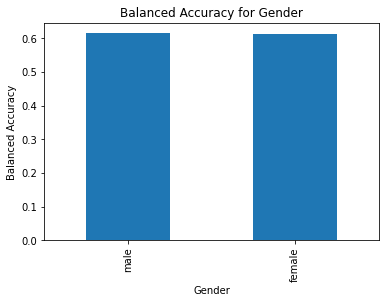

In [7]:
bal_acc_combo = list(zip(genders, gender_bal_acc))
df = pd.DataFrame(bal_acc_combo, columns = ['gender', 'balanced_accuracy'])

df.plot(
    x="gender", y="balanced_accuracy", kind="bar", legend=False
)
plt.title("Balanced Accuracy for Gender")
plt.xlabel("Gender")
plt.ylabel("Balanced Accuracy")

## F1 score: Gender

Text(0, 0.5, 'F1 score')

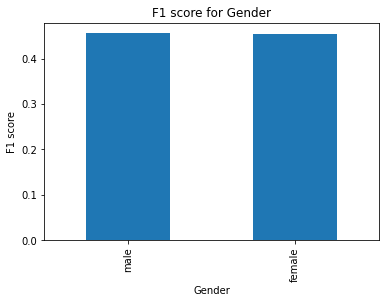

In [8]:
gender_f1 = []
for ind_list in gender_report:
    gender_f1.append(ind_list[2])

# type(genders)
f1_combo = list(zip(genders, gender_f1))

df = pd.DataFrame(f1_combo, columns = ['gender', 'gender_f1'])

df.plot(
    x="gender", y="gender_f1", kind="bar", legend=False
)
plt.title("F1 score for Gender")
plt.xlabel("Gender")
plt.ylabel("F1 score")


## Precision: Gender

Text(0, 0.5, 'Precision')

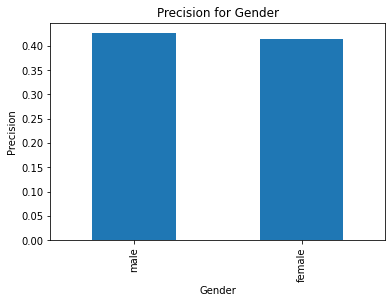

In [15]:
gender_precision = []
for ind_list in gender_report:
    gender_precision.append(ind_list[0])

# type(genders)
f1_combo = list(zip(genders, gender_precision))

df = pd.DataFrame(f1_combo, columns = ['gender', 'gender_precision'])

df.plot(
    x="gender", y="gender_precision", kind="bar", legend=False
)
plt.title("Precision for Gender")
plt.xlabel("Gender")
plt.ylabel("Precision")

## Recall: Gender

Text(0, 0.5, 'Recall')

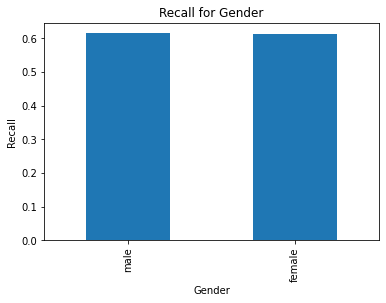

In [16]:
gender_recall = []
for ind_list in gender_report:
    gender_recall.append(ind_list[1])

# type(genders)
f1_combo = list(zip(genders, gender_recall))

df = pd.DataFrame(f1_combo, columns = ['gender', 'gender_recall'])

df.plot(
    x="gender", y="gender_recall", kind="bar", legend=False
)
plt.title("Recall for Gender")
plt.xlabel("Gender")
plt.ylabel("Recall")

# Skin Tone

In [9]:
skin_tone_report = []
skin_tone_bal_acc = []

skin_tones = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

for tone in skin_tones:
    df = (test_results_metadata.loc[test_results_metadata["fitzpatrick"] == tone])
    bal_acc = balanced_accuracy_score((df['actual']), (df['predicted']))
    skin_tone_bal_acc.append(bal_acc)

print(skin_tone_bal_acc)


for tone in skin_tones:
    df = (test_results_metadata.loc[test_results_metadata["fitzpatrick"] == tone])
    metric_report = precision_recall_fscore_support((df['actual']), (df['predicted']), average="macro", zero_division = 1)
    skin_tone_report.append(metric_report)

print(skin_tone_report)


[0.586838331625787, 0.6520552799433026, 0.5679557059326358, 0.5086580086580087, 0.425, 0.6537552306593182]
[(0.40491196197317714, 0.586838331625787, 0.43334026699971595, None), (0.470323957088663, 0.6520552799433026, 0.5021198528107332, None), (0.3339779093455564, 0.6219612426910563, 0.3653909577704758, None), (0.435042735042735, 0.5086580086580087, 0.43953125727319275, None), (0.5233333333333333, 0.425, 0.45, None), (0.44999063941721706, 0.6537552306593182, 0.4843930191822575, None)]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


## Balanced Accuracy: Skin Tone

Text(0, 0.5, 'Balanced Accuracy')

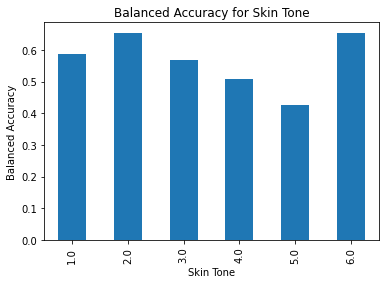

In [10]:
skin_tone_chart = list(zip(skin_tones, skin_tone_bal_acc))
df = pd.DataFrame(skin_tone_chart, columns = ['skin_tones', 'skin_tone_bal_acc'])

df.plot(
    x="skin_tones", y="skin_tone_bal_acc", kind="bar", legend=False
)
plt.title("Balanced Accuracy for Skin Tone")
plt.xlabel("Skin Tone")
plt.ylabel("Balanced Accuracy")

# Age 

In [11]:
ages = sorted(test_results_metadata["age_approx"].unique())
print(ages)
age_report = []
age_bal_acc = []

for age in ages:
    df = (test_results_metadata.loc[test_results_metadata["age_approx"] == age])
    bal_acc = balanced_accuracy_score((df['actual']), (df['predicted']))
    age_bal_acc.append(bal_acc)

print(age_bal_acc)


for age in ages:
    df = (test_results_metadata.loc[test_results_metadata["age_approx"] == age])
    metric_report = precision_recall_fscore_support((df['actual']), (df['predicted']), average="macro", zero_division = 1)
    age_report.append(metric_report)

print(age_report)


[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 80.0, nan, 75.0, 85.0]
[0.5, 0.6923076923076923, 0.4166666666666667, 0.5789473684210527, 0.611111111111111, 0.3128930817610063, 0.509609868043603, 0.7240878938640133, 0.4425308990526382, 0.648225677830941, 0.521700799377476, 0.6887473739495799, 0.6539434297586472, 0.5397678658017003, 0.5986956026429711, 0.5747427918535835, nan, 0.6873937074829932, 0.6443776693171366]
[(0.25, 0.875, 0.16666666666666666, None), (0.25, 0.9230769230769231, 0.20454545454545453, None), (0.25, 0.8541666666666666, 0.14705882352941177, None), (0.25, 0.7894736842105262, 0.25252525252525254, None), (0.34523809523809523, 0.7222222222222222, 0.34430546412113233, None), (0.1831787260358689, 0.6073674752920036, 0.16727574750830562, None), (0.3427685220852593, 0.5709086345381525, 0.34909003037834857, None), (0.30729985801660115, 0.7930659203980099, 0.3301953062369729, None), (0.29269317446842913, 0.5818981742894787, 0.301736658827

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_clas

## Balanced Accurary: Age



Text(0, 0.5, 'Balanced Accuracy')

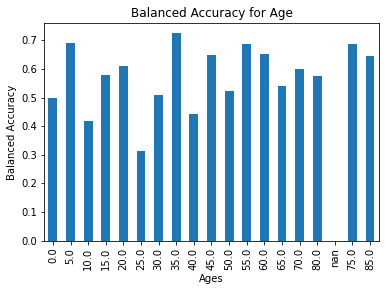

In [12]:
age_chart = list(zip(ages, age_bal_acc))
df = pd.DataFrame(age_chart, columns = ['ages', 'age_bal_acc'])

df.plot(
    x="ages", y="age_bal_acc", kind="bar", legend=False
)
plt.title("Balanced Accuracy for Age")
plt.xlabel("Ages")
plt.ylabel("Balanced Accuracy")

# Anatomical Skin Leison Location

In [13]:

locations = list(test_results_metadata["anatom_site_general"].unique())

print(locations)
location_report = []
location_bal_acc = []

for location in locations:
    df = (test_results_metadata.loc[test_results_metadata["anatom_site_general"] == location])
    bal_acc = balanced_accuracy_score((df['actual']), (df['predicted']))
    location_bal_acc.append(bal_acc)

print(location_bal_acc)


for location in locations:
    df = (test_results_metadata.loc[test_results_metadata["anatom_site_general"] == location])
    metric_report = precision_recall_fscore_support((df['actual']), (df['predicted']), average="macro", zero_division = 1)
    location_report.append(metric_report)

print(location_report)

['upper extremity', 'posterior torso', 'anterior torso', nan, 'lateral torso', 'lower extremity', 'head/neck', 'palms/soles', 'oral/genital']
[0.5205877976190476, 0.6162962962962962, 0.6123278258276955, nan, 0.3333333333333333, 0.5961009861610549, 0.5230121812972424, 0.3821428571428571, 0.3333333333333333]
[(0.3837653205358339, 0.5205877976190476, 0.4043303692484301, None), (0.38866313759991555, 0.6711111111111111, 0.37762946547776266, None), (0.3805938397759171, 0.6123278258276955, 0.4198971072971572, None), (nan, nan, nan, None), (0.3333333333333333, 0.5, 0.26666666666666666, None), (0.44017975445607027, 0.5961009861610549, 0.46999640937114545, None), (0.3618102711812322, 0.582635658635087, 0.3372711550836551, None), (0.23931623931623933, 0.4851190476190476, 0.2231676369607404, None), (0.5, 0.6666666666666666, 0.2222222222222222, None)]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.w

## Balanced Accuracy: Skin Leison Location

Text(0, 0.5, 'Balanced Accuracy')

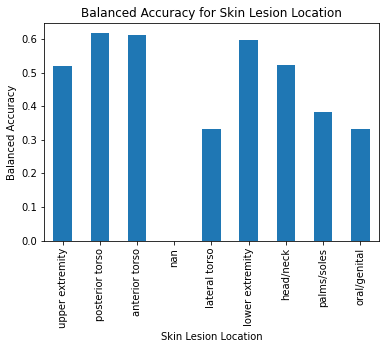

In [14]:
location_chart = list(zip(locations, location_bal_acc))
df = pd.DataFrame(location_chart, columns = ['locations', 'location_bal_acc'])

df.plot(
    x="locations", y="location_bal_acc", kind="bar", legend=False
)
plt.title("Balanced Accuracy for Skin Lesion Location")
plt.xlabel("Skin Lesion Location")
plt.ylabel("Balanced Accuracy")